# Import Libraries

In [12]:
import requests
import pandas as pd
import missingno as msno

# Load CSV dataset

In [13]:
df = pd.read_csv('hotel_booking.csv') 
df.head() #use to retrieve the first 5 rows

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [14]:
df.shape  #retrieve number of columns & rows

print('\nThe Total Number of Rows & Columns:\n')
print(df.shape)


The Total Number of Rows & Columns:

(119390, 36)


In [15]:
#retrieve summary of descriptive statistics
print('Descriptive Statistics:\n')
df.describe()

Descriptive Statistics:



,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


# Data Cleaning

In [16]:
#retrieve dataset datatypes
print('Dataset Data Types:\n')
print(df.info())

Dataset Data Types:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  


In [17]:
#Convert'reservation_status_date'col umn from object to date
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

In [24]:
#retrieve new dataset datatypes
print('Dataset Data types:\n')
print(df.info())

Dataset Data types:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119

In [21]:
#retreive all categorical details
for col in df.describe(include = 'object').columns:
    print(col)
    print(df[col].unique())
    print('-'*50)

hotel
['Resort Hotel' 'City Hotel']
--------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
--------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
--------------------------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'J

## Handling Missing Data

In [27]:
#check for missing values per column
missing_per_column = df.isnull().sum() 
print('Missing Values per Column:\n')
print(missing_per_column)

Missing Values per Column:

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                        

In [28]:
# Get the percentage of missing values per column
missing_percentage = df.isnull().mean() * 100
print('Percentage of Missing Values per Column:\n')
print(missing_percentage)

Percentage of Missing Values per Column:

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.003350
babies                             0.000000
meal                               0.000000
country                            0.408744
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                   

<Axes: >

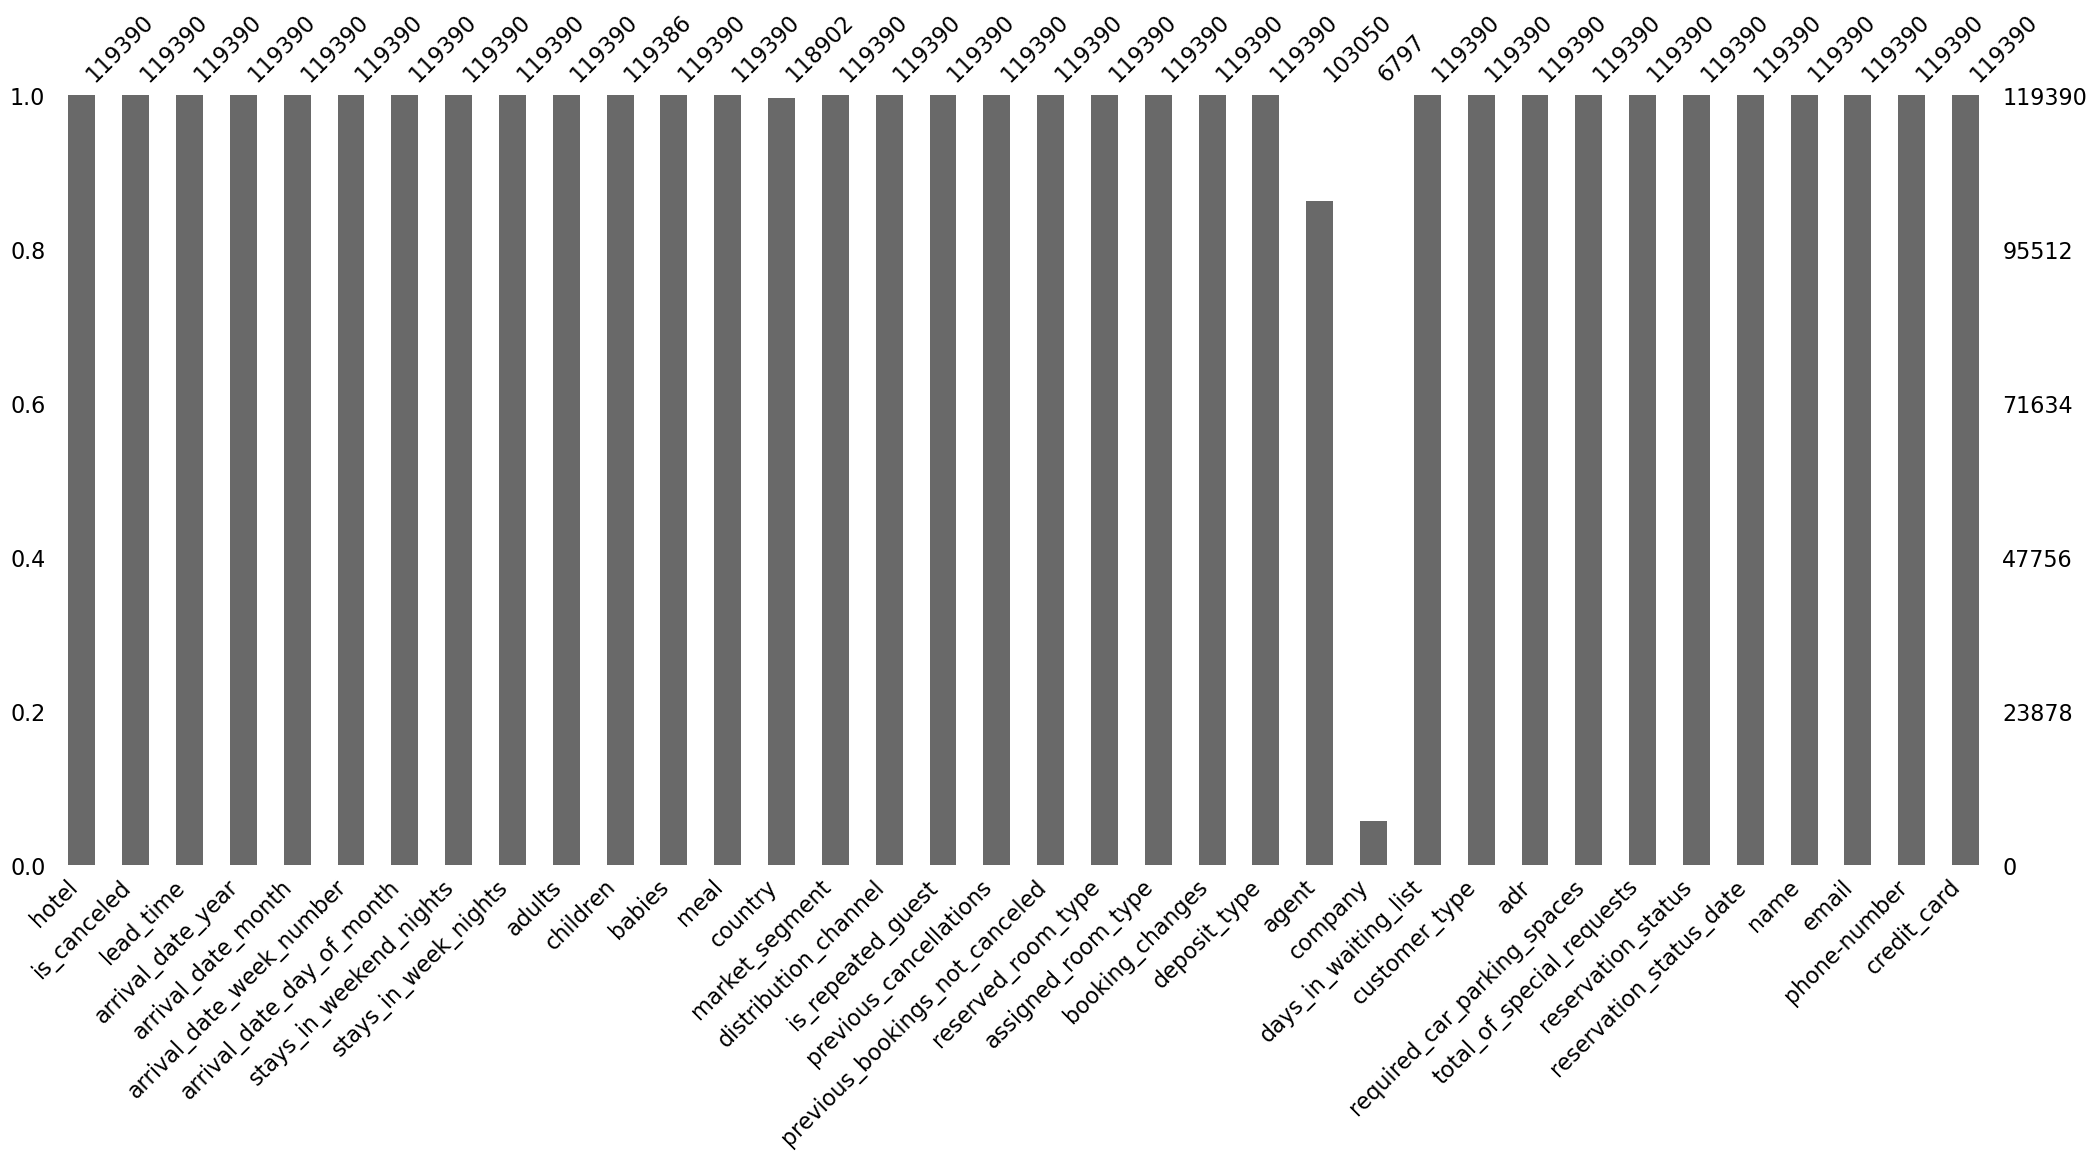

In [29]:
import missingno as msno
# Bar plot showing the count of missing values per column
msno.bar(df)

In [30]:
# Drop Rows with Missing Values
df_dropped_rows = df.dropna()
print("Data after dropping rows with missing values:\n")
df_dropped_rows.info()
#print(df_dropped_rows)

Data after dropping rows with missing values:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 217 entries, 2392 to 116451
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           217 non-null    object        
 1   is_canceled                     217 non-null    int64         
 2   lead_time                       217 non-null    int64         
 3   arrival_date_year               217 non-null    int64         
 4   arrival_date_month              217 non-null    object        
 5   arrival_date_week_number        217 non-null    int64         
 6   arrival_date_day_of_month       217 non-null    int64         
 7   stays_in_weekend_nights         217 non-null    int64         
 8   stays_in_week_nights            217 non-null    int64         
 9   adults                          217 non-null    int64         
 10  children             

In [32]:
df_dropped_rows.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
2392,Resort Hotel,0,6,2015,October,42,11,2,0,2,...,Transient,82.0,1,1,Check-Out,2015-10-13,Darryl Phillips,Darryl_Phillips@hotmail.com,731-360-4698,************2677
2697,Resort Hotel,0,24,2015,October,44,26,7,15,1,...,Transient-Party,52.2,0,0,Check-Out,2015-11-17,Lynn Gaines,Lynn.Gaines77@yahoo.com,866-053-4253,************6564
2867,Resort Hotel,0,24,2015,November,45,3,0,3,2,...,Transient-Party,48.0,0,0,Check-Out,2015-11-06,Richard Diaz,Richard.Diaz@mail.com,836-443-4157,************8259
2877,Resort Hotel,0,24,2015,November,45,3,2,10,1,...,Transient-Party,40.0,0,0,Check-Out,2015-11-15,Karen Lynch,KarenLynch@att.com,153-365-6906,************5124
2878,Resort Hotel,0,24,2015,November,45,3,3,10,2,...,Transient-Party,48.0,0,0,Check-Out,2015-11-16,Joseph Livingston,Joseph.L@protonmail.com,175-653-7050,************3824


In [34]:
df_dropped_rows.shape

(217, 36)

In [35]:
df_dropped_rows.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 217 entries, 2392 to 116451
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           217 non-null    object        
 1   is_canceled                     217 non-null    int64         
 2   lead_time                       217 non-null    int64         
 3   arrival_date_year               217 non-null    int64         
 4   arrival_date_month              217 non-null    object        
 5   arrival_date_week_number        217 non-null    int64         
 6   arrival_date_day_of_month       217 non-null    int64         
 7   stays_in_weekend_nights         217 non-null    int64         
 8   stays_in_week_nights            217 non-null    int64         
 9   adults                          217 non-null    int64         
 10  children                        217 non-null    float64       
 11  

# Export the DataFrame to a CSV file

In [36]:
df_dropped_rows.to_csv('cleaned_hotel_booking.csv', index=False)